In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt
from WeakLearners2 import WongNeuralNetCIFAR102

In [3]:
import apex

In [4]:
from Boosting import runBoosting

In [5]:
import utils

In [6]:
cuda = torch.device('cuda:0')

In [7]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


# Vanilla Wong Neural Net CIFAR10

## Non Adv

In [7]:
cifar10_vanilla = WongNeuralNetCIFAR10()
cifar10_vanilla.fit(train_loader, test_loader, alpha = 0, epochs = 100, adv=False, epsilon=0)

TypeError: fit() got an unexpected keyword argument 'adv'

In [ ]:
cifar10_vanilla.plot_train(batchSize = 100)

In [ ]:
cifar10_vanilla.plot_val_accuracies(batchSize = 100)

In [ ]:
print(cifar10_vanilla)

## Adversarial

In [8]:
from AdversarialAttacks import attack_fgsm, attack_pgd

In [9]:
# maxSamples = int(2e6)
maxSamples = 750000

In [10]:
cifar10_adv = WongNeuralNetCIFAR102(attack_eps=[0.127], train_eps=8)
cifar10_adv.fit(train_loader, test_loader, adv_train=True, val_attacks=[attack_pgd], maxSample=maxSamples)

Epoch 	 Seconds 	 LR 	 	 Train Loss 	 Train Acc
Progress: 12800,  val accuracy: 0.2900
PGD accuracy: [[0.16]]
Progress: 25600,  val accuracy: 0.3900
PGD accuracy: [[0.16, 0.25]]
Progress: 38400,  val accuracy: 0.3400
PGD accuracy: [[0.16, 0.25, 0.22]]
Progress: 62848,  val accuracy: 0.4600
PGD accuracy: [[0.16, 0.25, 0.22, 0.26]]
Progress: 75648,  val accuracy: 0.4000
PGD accuracy: [[0.16, 0.25, 0.22, 0.26, 0.27]]
Progress: 88448,  val accuracy: 0.4400
PGD accuracy: [[0.16, 0.25, 0.22, 0.26, 0.27, 0.27]]
Progress: 112896,  val accuracy: 0.4100
PGD accuracy: [[0.16, 0.25, 0.22, 0.26, 0.27, 0.27, 0.25]]
Progress: 125696,  val accuracy: 0.4500
PGD accuracy: [[0.16, 0.25, 0.22, 0.26, 0.27, 0.27, 0.25, 0.3]]
Progress: 138496,  val accuracy: 0.5300
PGD accuracy: [[0.16, 0.25, 0.22, 0.26, 0.27, 0.27, 0.25, 0.3, 0.25]]
Progress: 162944,  val accuracy: 0.5600
PGD accuracy: [[0.16, 0.25, 0.22, 0.26, 0.27, 0.27, 0.25, 0.3, 0.25, 0.29]]
Progress: 175744,  val accuracy: 0.4800
PGD accuracy: [[0.16,

In [10]:
cifar10_adv.accuracies

{'train': [0.25,
  0.23,
  0.32,
  0.33,
  0.41,
  0.3,
  0.3,
  0.45,
  0.51,
  0.45,
  0.41,
  0.4,
  0.42,
  0.39,
  0.44,
  0.47,
  0.5,
  0.45,
  0.46,
  0.49,
  0.45,
  0.5,
  0.52,
  0.44,
  0.55,
  0.62,
  0.57,
  0.55,
  0.59,
  0.56,
  0.48,
  0.63,
  0.52,
  0.52,
  0.63,
  0.61,
  0.55,
  0.6,
  0.69,
  0.57,
  0.6,
  0.64,
  0.68,
  0.68,
  0.59,
  0.62,
  0.63,
  0.68,
  0.6,
  0.58,
  0.76,
  0.6,
  0.66,
  0.66,
  0.71,
  0.68,
  0.66,
  0.74,
  0.67,
  0.66,
  0.63,
  0.71,
  0.67,
  0.63,
  0.73,
  0.72,
  0.66,
  0.65,
  0.62,
  0.69,
  0.72,
  0.71,
  0.73,
  0.68],
 'val': [0.255,
  0.301,
  0.338,
  0.32,
  0.363,
  0.363,
  0.376,
  0.378,
  0.393,
  0.416,
  0.403,
  0.415,
  0.458,
  0.426,
  0.461,
  0.473,
  0.48,
  0.494,
  0.493,
  0.511,
  0.51,
  0.515,
  0.53,
  0.533,
  0.514,
  0.554,
  0.578,
  0.559,
  0.571,
  0.605,
  0.558,
  0.617,
  0.572,
  0.601,
  0.608,
  0.605,
  0.622,
  0.632,
  0.651,
  0.662,
  0.66,
  0.632,
  0.665,
  0.662,
  0.621,


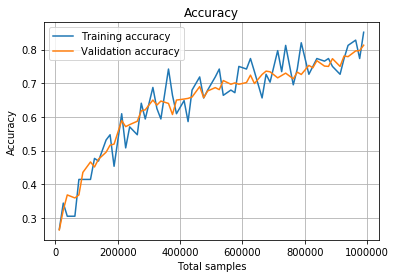

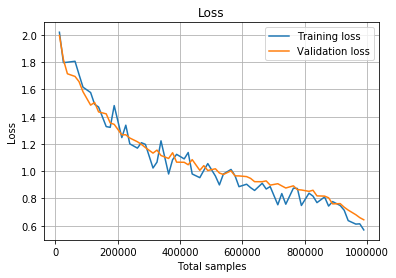

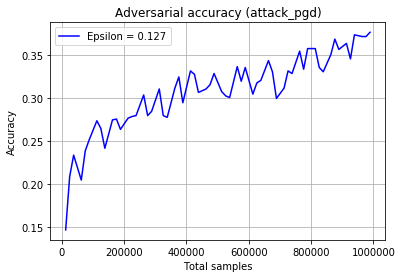

In [10]:
path_head = 'results/plots/cifar10_wl/eps_8/'
acc_file = path_head + f'wl_acc_maxSamples_{maxSamples}.png'
adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
cifar10_adv.plot_accuracies(acc_file)
cifar10_adv.plot_loss(loss_file)
cifar10_adv.plot_adversarial_accuracies(adv_acc_file)

In [ ]:
print(cifar10_adv.train_checkpoints)